In [231]:
library(readxl)
library(tseries)
library(forecast)
library(TSA)
library(dplyr)
library(car)
library(fitdistrplus)
library(nortest)
library(ggplot2)
library(caret)
library(corrplot)
library(neuralnet)
library(randomForest)
library(zoo)

# (a) Take the data to the data processing package (preferably, R).

In [232]:
data <- read.csv("dictatMTS.csv")

In [233]:
head(data)

,X,participant.code,cityname,role,group.S_transfer,group.S_self_part,group.S_prediction,group.R_prediction,group.R_min_offer,round,group.pie_size,group.unit_value_for_S,group.unit_value_for_R,treat,treatmp,player.age,player.gender,player.riskat,player.income
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2,0orwdijp,S,1,48,52,40,0,50,6,100,1,1,Sender_SamMos,SamMos,20,0,2,5
2,3,0orwdijp,S,1,30,30,30,0,30,3,60,1,1,Sender_SamMos,SamMos,20,0,2,5
3,4,0orwdijp,S,1,65,35,60,28,80,4,100,3,1,Sender_SamMos,SamMos,20,0,2,5
4,5,0orwdijp,S,1,0,0,5,10,17,1,100,1,3,Sender_SamMos,SamMos,20,0,2,5
5,6,0orwdijp,S,1,17,43,20,0,45,2,60,3,1,Sender_SamMos,SamMos,20,0,2,5
6,7,0orwdijp,S,1,9,51,7,0,15,5,60,1,3,Sender_SamMos,SamMos,20,0,2,5


In [234]:
tail(data)

,X,participant.code,cityname,role,group.S_transfer,group.S_self_part,group.S_prediction,group.R_prediction,group.R_min_offer,round,group.pie_size,group.unit_value_for_S,group.unit_value_for_R,treat,treatmp,player.age,player.gender,player.riskat,player.income
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>
919,1016,zsy00a7b,M,1,25,35,20,10,20,1,60,1,1,Sender_MosMos,MosMos,NA,NA,NA,NA
920,1017,zsy00a7b,M,1,15,45,10,20,30,2,60,1,3,Sender_MosMos,MosMos,NA,NA,NA,NA
921,1018,zsy00a7b,M,1,45,55,30,20,20,3,100,1,1,Sender_MosMos,MosMos,NA,NA,NA,NA
922,1019,zsy00a7b,M,1,25,75,15,25,50,4,100,1,3,Sender_MosMos,MosMos,NA,NA,NA,NA
923,1020,zsy00a7b,M,1,75,25,60,25,25,5,100,3,1,Sender_MosMos,MosMos,NA,NA,NA,NA
924,1021,zsy00a7b,M,1,15,45,30,20,20,6,60,3,1,Sender_MosMos,MosMos,NA,NA,NA,NA


In [235]:
glimpse(data)

Rows: 924
Columns: 19
$ X                      <int> 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ participant.code       <chr> "0orwdijp", "0orwdijp", "0orwdijp", "0orwdijp",…
$ cityname               <chr> "S", "S", "S", "S", "S", "S", "S", "S", "S", "S…
$ role                   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,…
$ group.S_transfer       <int> 48, 30, 65, 0, 17, 9, 75, 45, 25, 30, 15, 50, 5…
$ group.S_self_part      <int> 52, 30, 35, 0, 43, 51, 25, 15, 75, 30, 45, 50, …
$ group.S_prediction     <int> 40, 30, 60, 5, 20, 7, 50, 30, 20, 20, 30, 50, 5…
$ group.R_prediction     <int> 0, 0, 28, 10, 0, 0, 60, 25, 30, 20, 15, 50, 40,…
$ group.R_min_offer      <int> 50, 30, 80, 17, 45, 15, 50, 30, 15, 20, 10, 35,…
$ round                  <int> 6, 3, 4, 1, 2, 5, 4, 1, 5, 3, 6, 2, 3, 4, 1, 6,…
$ group.pie_size         <int> 100, 60, 100, 100, 60, 60, 100, 60, 100, 60, 60…
$ group.unit_value_for_S <int> 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1,…
$ group.unit_value

________

# (b) Construct normalized values of transfer, keep, MAO decisions and expectations about them

Построим **квантиль-квантиль график** изначальных данных

Для этого создадим **фрейм** из необходимых данных

In [236]:
m <- data.frame(data$group.S_transfer,data$group.S_self_part,data$group.S_prediction, data$group.R_prediction)

In [237]:
m_tmp <- m

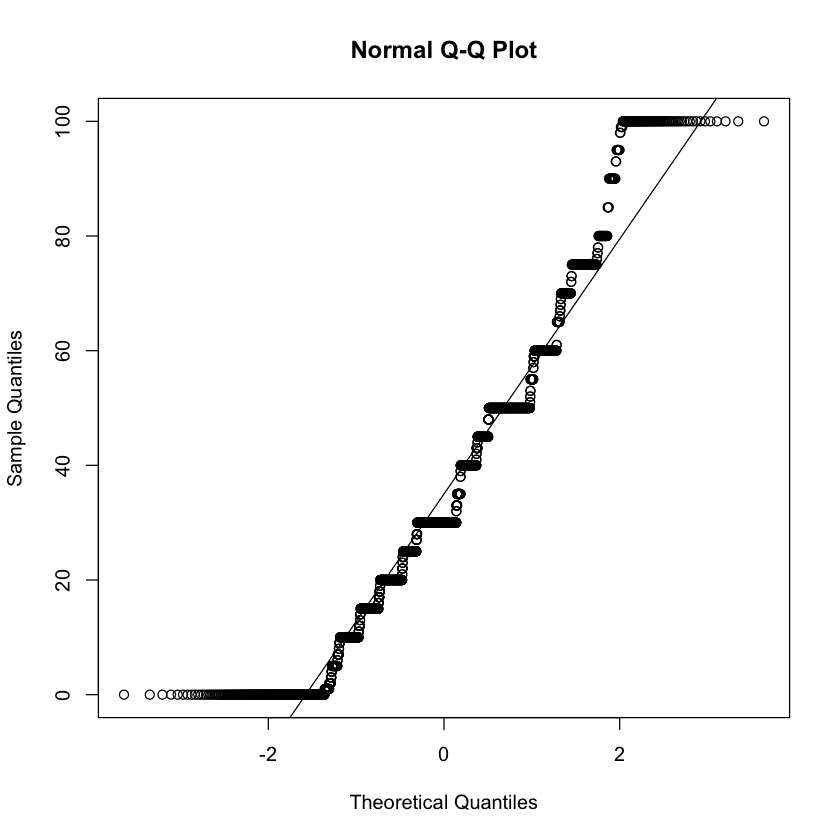

In [238]:
tmp <- data.matrix(m)
qqnorm(tmp)
qqline(tmp)

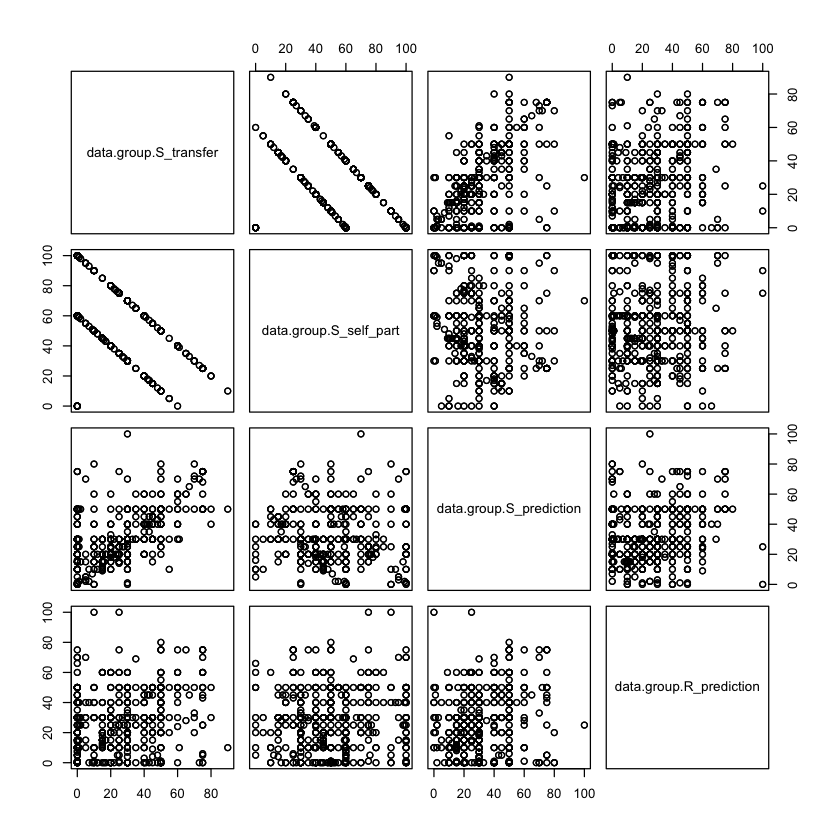

In [239]:
plot(m)

Перезададим m, добавив туда group.unit_value_for_S и group.unit_value_for_R, их мы будем учитывать при нормализации данных

In [240]:
m <- data.frame(data$group.S_transfer,data$group.S_self_part,data$group.S_prediction, data$group.R_prediction, data$group.pie_size, data$group.unit_value_for_S, data$group.unit_value_for_R)

In [241]:
head(m)

,data.group.S_transfer,data.group.S_self_part,data.group.S_prediction,data.group.R_prediction,data.group.pie_size,data.group.unit_value_for_S,data.group.unit_value_for_R
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,48,52,40,0,100,1,1
2,30,30,30,0,60,1,1
3,65,35,60,28,100,3,1
4,0,0,5,10,100,1,3
5,17,43,20,0,60,3,1
6,9,51,7,0,60,1,3


In [242]:
tail(m)

,data.group.S_transfer,data.group.S_self_part,data.group.S_prediction,data.group.R_prediction,data.group.pie_size,data.group.unit_value_for_S,data.group.unit_value_for_R
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
919,25,35,20,10,60,1,1
920,15,45,10,20,60,1,3
921,45,55,30,20,100,1,1
922,25,75,15,25,100,1,3
923,75,25,60,25,100,3,1
924,15,45,30,20,60,3,1


Существует несколько способов нормализации данных, для их оценки их успешности необходимо задать функцию [**compareTransformation**](https://rpubs.com/lapotok/data_normalization)

In [243]:
compareTransformations = function(var.nonscaled){

  require(caret)
  require(ipred)
  
  if (is.data.frame(var.nonscaled)) var.nonscaled = var.nonscaled[[1]]
  if (is.matrix(var.nonscaled)) var.nonscaled = as.numeric(var.nonscaled)
  
  var.scaled = scale(var.nonscaled)
  len = length(var.nonscaled)
  
  # different types of transformations
  pp.list = c( "BoxCox", "YeoJohnson", "expoTrans", "range", "knnImpute", "medianImpute", "zv", "nzv", "conditionalX")
  
  dt = data.frame(transform=rep("scaled",len), data=var.scaled)
  
  for (pp in pp.list){
    pp.obj = preProcess(x=data.frame(x=var.nonscaled), method=pp)
    pp.res = predict(pp.obj, data.frame(x=var.nonscaled))
    dt = rbind(dt, data.frame(transform=rep(pp,len),data=scale(pp.res[,1])))
  }
  
  # log
  dt = rbind(dt, data.frame(transform=rep("log",len),data=scale(log(var.scaled+3))))
  # sqrt
  dt = rbind(dt, data.frame(transform=rep("sqrt",len),data=scale(sqrt(var.scaled+3))))
  # 1/(data+1)
  dt = rbind(dt, data.frame(transform=rep("1/(data+1)",len),data=scale(1/(var.scaled+1))))
  # data^2
  dt = rbind(dt, data.frame(transform=rep("data^2",len),data=scale(var.scaled^2)))
  # logit
  dt = rbind(dt, data.frame(transform=rep("logit",len),data=scale((var.scaled+3)/(1-(var.scaled+3)))))
  # arcsin
  dt = rbind(dt, data.frame(transform=rep("arcsin",len),data=scale(asin(scale(sqrt(var.scaled+3))/3))))
  
  dt.sh = c()
  dt.list = list()
  for (pp in unique(dt[,1])){
    dt.list[[pp]] = dt[dt[,1]==pp,2]
    dt.sh = c(dt.sh,sprintf("%.3f",shapiro.test(dt.list[[pp]])$p.value))
  }
  dt.sh.col = numeric(length(dt.sh))
  dt.sh.col[dt.sh>0.1] = "red"
  dt.sh.col[dt.sh<=0.1] = "gray"
  
  
  g = ggplot(dt,aes(x=transform, y=data)) +
    geom_boxplot(fill="cyan", size=.9) +
    geom_jitter(color="blue",alpha=0.3) +
    theme_bw(base_size = 16) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.2)) +
    geom_text(data=data.frame(), aes(x=1:length(unique(dt[,1])), y=rep(-4, length(unique(dt[,1]))), label=dt.sh),col=dt.sh.col) +
    coord_cartesian(ylim=c(-5,5))
  print(g)
  
  dt.list
}

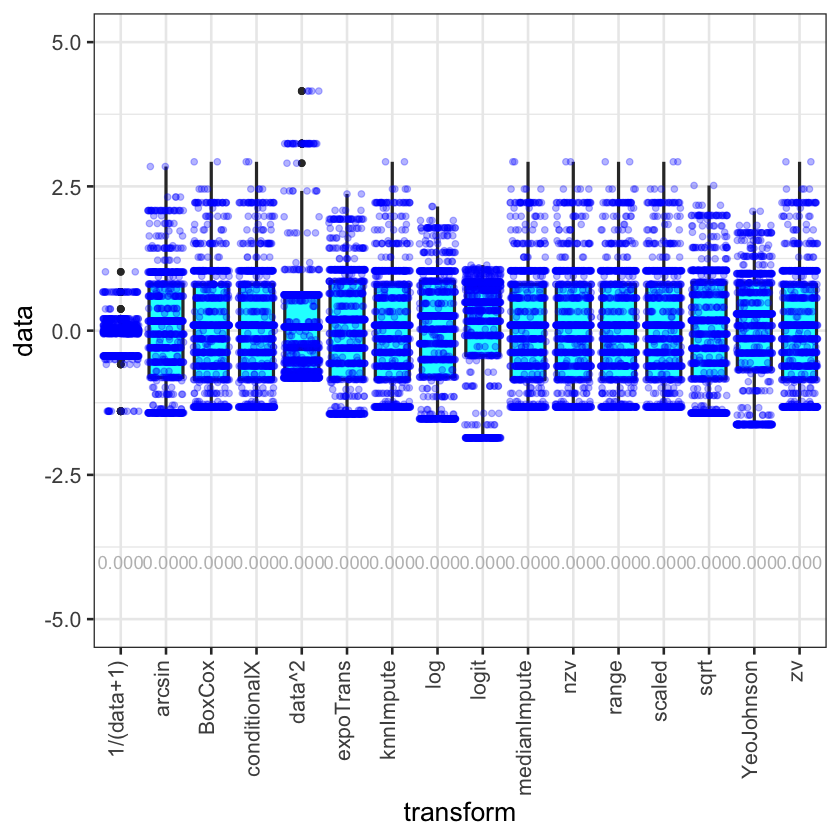

In [244]:
transformedData = compareTransformations(m)

Видим, что при любом способе нормализации данные нельзя будет считать нормально-распределенными. 
Значит и не имеют место проверки гипотез о нормальности полученных данных разными тестами, например: 
- **Тест Колмогорова-Смирнова (ks.test)**

Тем не менее, поскольку данные имеют только числовые значения, можем использовать **шкалирование - scale**, ставим параметры нормирования: 
- **среднее значение 0** 
- **стандартное отклонение 1**

In [245]:
m <- scale(m)
apply(m, 2, sd)

data.group.S_transfer      data.group.S_self_part 
                          1                           1 
    data.group.S_prediction     data.group.R_prediction 
                          1                           1 
        data.group.pie_size data.group.unit_value_for_S 
                          1                           1 
data.group.unit_value_for_R 
                          1

In [246]:
head(m)

data.group.S_transfer,data.group.S_self_part,data.group.S_prediction,data.group.R_prediction,data.group.pie_size,data.group.unit_value_for_S,data.group.unit_value_for_R
0.94336363,0.07165346,0.3787429,-1.38415807,0.9994587,-0.706724,-0.706724
0.09360064,-0.82969030,-0.1844345,-1.38415807,-0.9994587,-0.706724,-0.706724
1.74591757,-0.62483945,1.5050979,0.02450126,0.9994587,1.413448,-0.706724
-1.32267102,-2.05879544,-1.5923782,-0.88106545,0.9994587,-0.706724,1.413448
-0.52011708,-0.29707808,-0.7476120,-1.38415807,-0.9994587,1.413448,-0.706724
-0.89778952,0.03068329,-1.4797427,-1.38415807,-0.9994587,-0.706724,1.413448


In [247]:
tail(m)

,data.group.S_transfer,data.group.S_self_part,data.group.S_prediction,data.group.R_prediction,data.group.pie_size,data.group.unit_value_for_S,data.group.unit_value_for_R
"[919,]",-0.1424446,-0.6248394,-0.7476120,-0.8810655,-0.9994587,-0.706724,-0.706724
"[920,]",-0.6145352,-0.2151377,-1.3107895,-0.3779728,-0.9994587,-0.706724,1.413448
"[921,]",0.8017365,0.1945640,-0.1844345,-0.3779728,0.9994587,-0.706724,-0.706724
"[922,]",-0.1424446,1.0139674,-1.0292007,-0.1264265,0.9994587,-0.706724,1.413448
"[923,]",2.2180081,-1.0345412,1.5050979,-0.1264265,0.9994587,1.413448,-0.706724
"[924,]",-0.6145352,-0.2151377,-0.1844345,-0.3779728,-0.9994587,1.413448,-0.706724


Удостовериваемся в этом

In [248]:
summary(m)

 data.group.S_transfer data.group.S_self_part data.group.S_prediction
 Min.   :-1.3227       Min.   :-2.05880       Min.   :-1.8740        
 1st Qu.:-0.8506       1st Qu.:-0.82969       1st Qu.:-0.7476        
 Median : 0.0936       Median :-0.01029       Median :-0.1844        
 Mean   : 0.0000       Mean   : 0.00000       Mean   : 0.0000        
 3rd Qu.: 0.8017       3rd Qu.: 0.39941       3rd Qu.: 0.9419        
 Max.   : 2.9261       Max.   : 2.03822       Max.   : 3.7578        
 data.group.R_prediction data.group.pie_size data.group.unit_value_for_S
 Min.   :-1.38416        Min.   :-0.9995     Min.   :-0.7067            
 1st Qu.:-0.88106        1st Qu.:-0.9995     1st Qu.:-0.7067            
 Median : 0.07481        Median : 0.0000     Median :-0.7067            
 Mean   : 0.00000        Mean   : 0.0000     Mean   : 0.0000            
 3rd Qu.: 0.62821        3rd Qu.: 0.9995     3rd Qu.: 1.4134            
 Max.   : 3.64677        Max.   : 0.9995     Max.   : 1.4134            

Строим квантиль-квантиль график для полученных данных

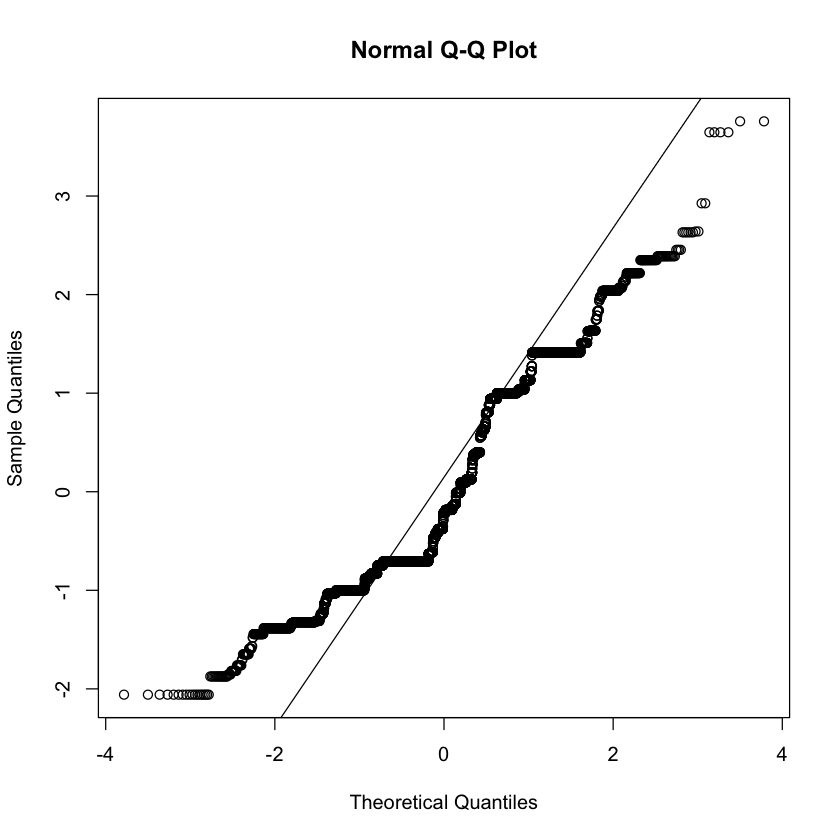

In [249]:
qqnorm(m)
qqline(m)

Следующей итерацией нормирования может служить добавление к данным ряда из чисел, которые имеют нормальное распределение
- Воспользуемся функцией **rnorm**

In [250]:
m_norm <- m_norm <- data.frame(rnorm(924), data$group.S_transfer,data$group.S_self_part,data$group.S_prediction, data$group.R_prediction, data$group.pie_size, data$group.unit_value_for_S, data$group.unit_value_for_R)
m_norm <- scale(m_norm)
apply(m_norm, 2, sd)

rnorm.924.       data.group.S_transfer 
                          1                           1 
     data.group.S_self_part     data.group.S_prediction 
                          1                           1 
    data.group.R_prediction         data.group.pie_size 
                          1                           1 
data.group.unit_value_for_S data.group.unit_value_for_R 
                          1                           1

In [251]:
head(m_norm)

rnorm.924.,data.group.S_transfer,data.group.S_self_part,data.group.S_prediction,data.group.R_prediction,data.group.pie_size,data.group.unit_value_for_S,data.group.unit_value_for_R
0.7880566,0.94336363,0.07165346,0.3787429,-1.38415807,0.9994587,-0.706724,-0.706724
1.1735872,0.09360064,-0.82969030,-0.1844345,-1.38415807,-0.9994587,-0.706724,-0.706724
0.8829858,1.74591757,-0.62483945,1.5050979,0.02450126,0.9994587,1.413448,-0.706724
-0.6246170,-1.32267102,-2.05879544,-1.5923782,-0.88106545,0.9994587,-0.706724,1.413448
-0.2202079,-0.52011708,-0.29707808,-0.7476120,-1.38415807,-0.9994587,1.413448,-0.706724
2.0633316,-0.89778952,0.03068329,-1.4797427,-1.38415807,-0.9994587,-0.706724,1.413448


In [252]:
tail(m_norm)

,rnorm.924.,data.group.S_transfer,data.group.S_self_part,data.group.S_prediction,data.group.R_prediction,data.group.pie_size,data.group.unit_value_for_S,data.group.unit_value_for_R
"[919,]",0.2017196,-0.1424446,-0.6248394,-0.7476120,-0.8810655,-0.9994587,-0.706724,-0.706724
"[920,]",-0.4904858,-0.6145352,-0.2151377,-1.3107895,-0.3779728,-0.9994587,-0.706724,1.413448
"[921,]",1.0898278,0.8017365,0.1945640,-0.1844345,-0.3779728,0.9994587,-0.706724,-0.706724
"[922,]",0.2798499,-0.1424446,1.0139674,-1.0292007,-0.1264265,0.9994587,-0.706724,1.413448
"[923,]",-1.1214257,2.2180081,-1.0345412,1.5050979,-0.1264265,0.9994587,1.413448,-0.706724
"[924,]",0.6029478,-0.6145352,-0.2151377,-0.1844345,-0.3779728,-0.9994587,1.413448,-0.706724


In [253]:
summary(m_norm)

   rnorm.924.        data.group.S_transfer data.group.S_self_part
 Min.   :-2.987047   Min.   :-1.3227       Min.   :-2.05880      
 1st Qu.:-0.702827   1st Qu.:-0.8506       1st Qu.:-0.82969      
 Median :-0.001717   Median : 0.0936       Median :-0.01029      
 Mean   : 0.000000   Mean   : 0.0000       Mean   : 0.00000      
 3rd Qu.: 0.639205   3rd Qu.: 0.8017       3rd Qu.: 0.39941      
 Max.   : 2.737423   Max.   : 2.9261       Max.   : 2.03822      
 data.group.S_prediction data.group.R_prediction data.group.pie_size
 Min.   :-1.8740         Min.   :-1.38416        Min.   :-0.9995    
 1st Qu.:-0.7476         1st Qu.:-0.88106        1st Qu.:-0.9995    
 Median :-0.1844         Median : 0.07481        Median : 0.0000    
 Mean   : 0.0000         Mean   : 0.00000        Mean   : 0.0000    
 3rd Qu.: 0.9419         3rd Qu.: 0.62821        3rd Qu.: 0.9995    
 Max.   : 3.7578         Max.   : 3.64677        Max.   : 0.9995    
 data.group.unit_value_for_S data.group.unit_value_for_

Строим квантиль-квантиль график для полученных данных

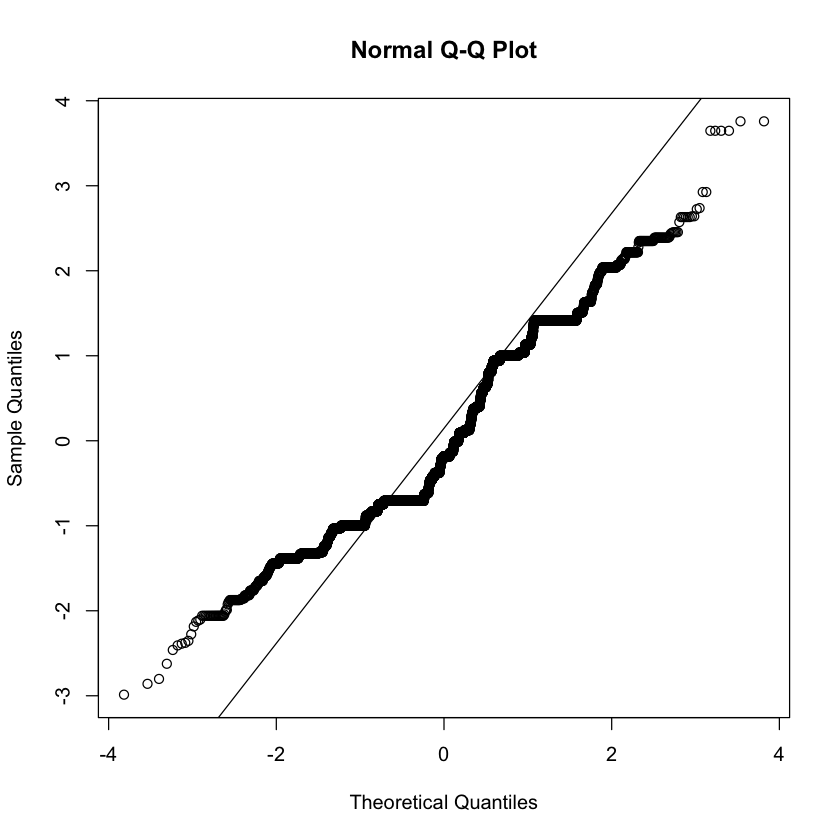

In [254]:
qqnorm(m_norm)
qqline(m_norm)

__________

# (с) Test the hypothesis that there is no difference between rounds (decisions) in the shares transferred, MAOs and expectations.

Перезадем фрейм для необходимых данных:
- В исходных данных раунды разбросаны, для дальнейшего анализа отсортируем фрейм по раундам

In [255]:
m <- data.frame(data$round, data$group.S_transfer,data$group.S_prediction, data$group.R_prediction, data$group.R_min_offer)
m.sort <- m[order(m[,"data.round"]), , drop = FALSE]

In [256]:
head(m.sort)

,data.round,data.group.S_transfer,data.group.S_prediction,data.group.R_prediction,data.group.R_min_offer
,<int>,<int>,<int>,<int>,<int>
4,1,0,5,10,17
8,1,45,30,25,30
15,1,20,40,10,8
19,1,45,50,50,50
30,1,0,40,60,70
34,1,30,30,20,20


In [257]:
tail(m.sort)

,data.round,data.group.S_transfer,data.group.S_prediction,data.group.R_prediction,data.group.R_min_offer
,<int>,<int>,<int>,<int>,<int>
894,6,48,40,0,50
900,6,15,30,20,20
904,6,30,30,30,10
908,6,2,50,30,20
915,6,30,30,33,30
924,6,15,30,20,20


Воспользуемся **методом "пристального взгляда"**, построив зависимости 

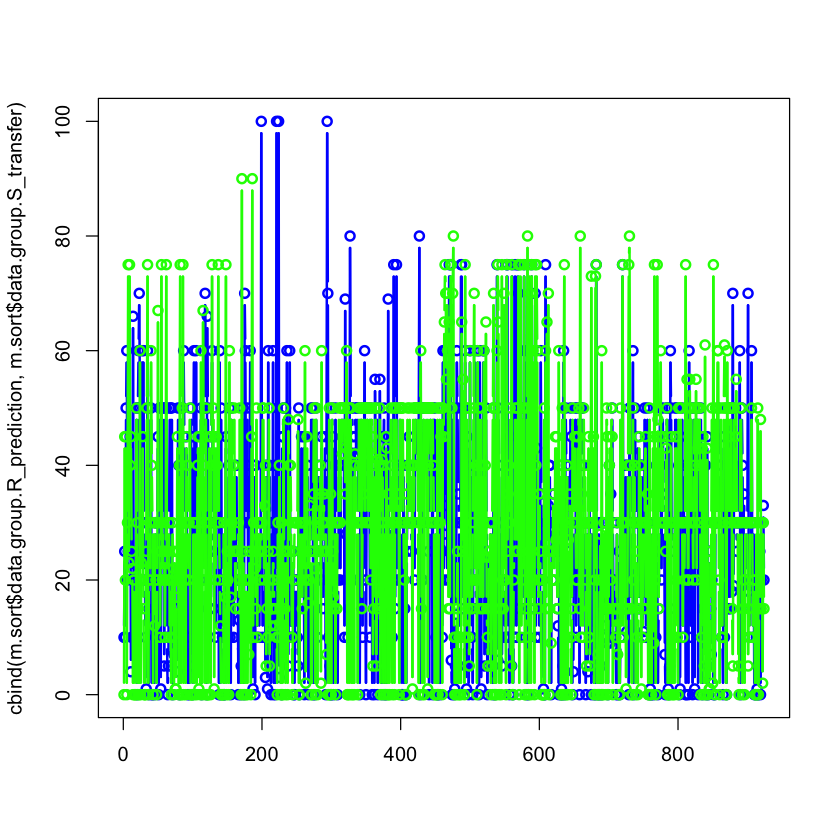

In [258]:
matplot(cbind(m.sort$data.group.R_prediction, m.sort$data.group.S_transfer), type ='b',pch=21,lwd = 2, col = c('blue','green'),lty = 1)

Очевидно, что трансфер не совпадает с предсказанием. Тем не менее рассмотрим их разницу: 
$$
\large \Delta = R.prediction_i - transfer_i \\
\large i = 1,...,length(data)
$$

In [259]:
diff <- m.sort$data.group.R_prediction - m.sort$data.group.S_transfer
length(diff)

[1] 924

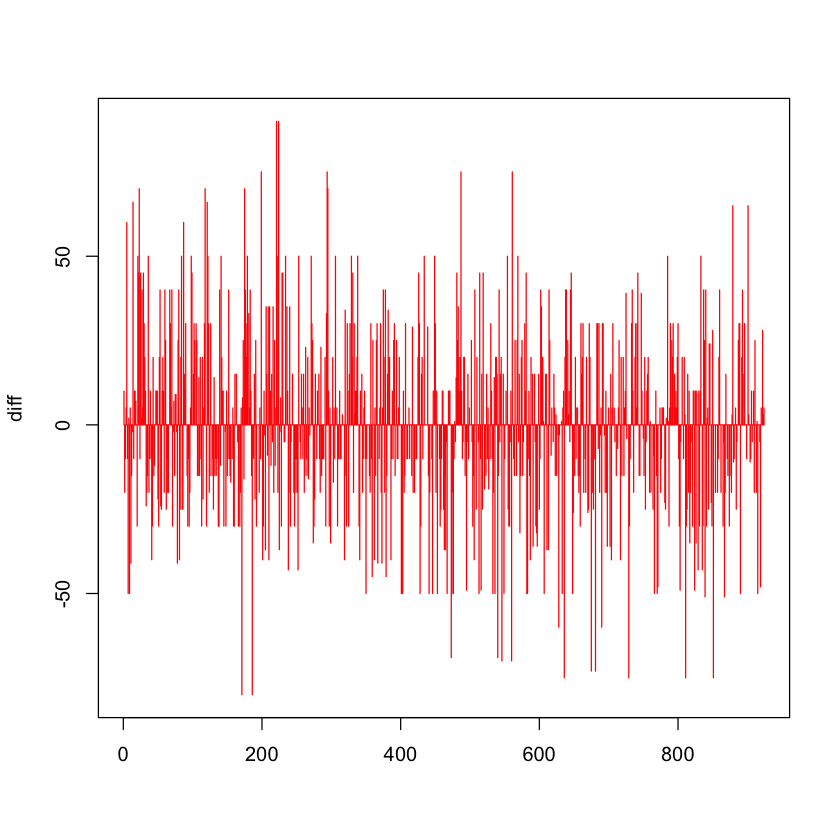

In [260]:
matplot(diff, type = "h", col = "red")

Разброс разницы достаточно большой

Аналогично поступим и для сравнительного анализа **min_offer** с **S_prediction**

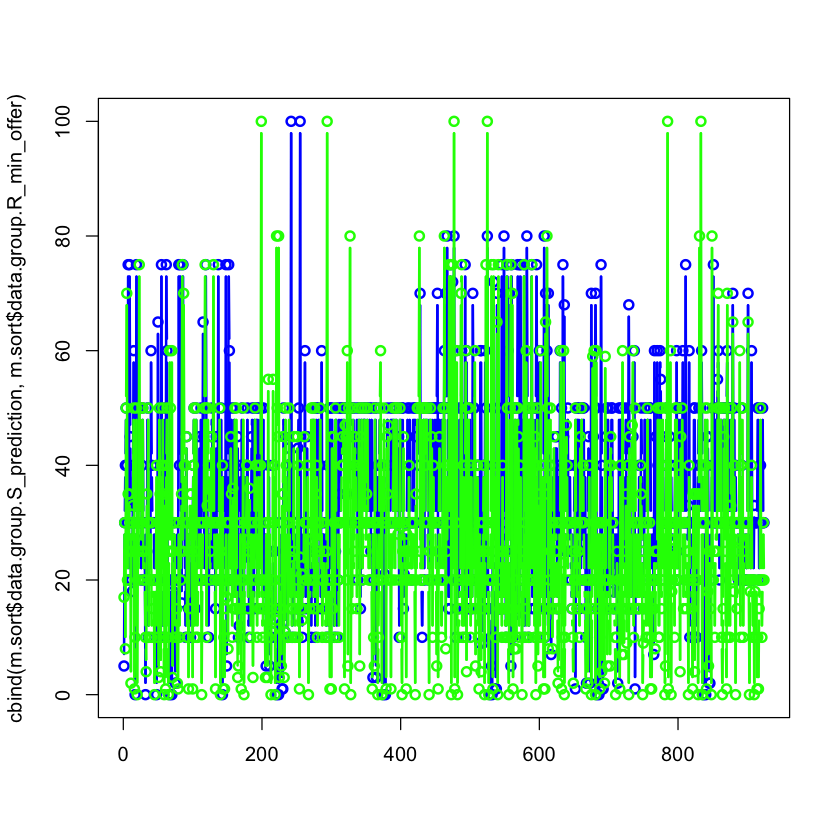

In [261]:
matplot(cbind(m.sort$data.group.S_prediction, m.sort$data.group.R_min_offer), type ='b',pch=21,lwd = 2, col = c('blue','green'),lty = 1)

Очевидно, что минимальный оффер не совпадает с предсказанием. Тем не менее рассмотрим их разницу: 
$$
\large \Delta = min.offer_i - S.prediction_i \\
\large i = 1,...,length(data)
$$

In [262]:
diff <- m.sort$data.group.R_min_offer - m.sort$data.group.S_prediction
length(diff)

[1] 924

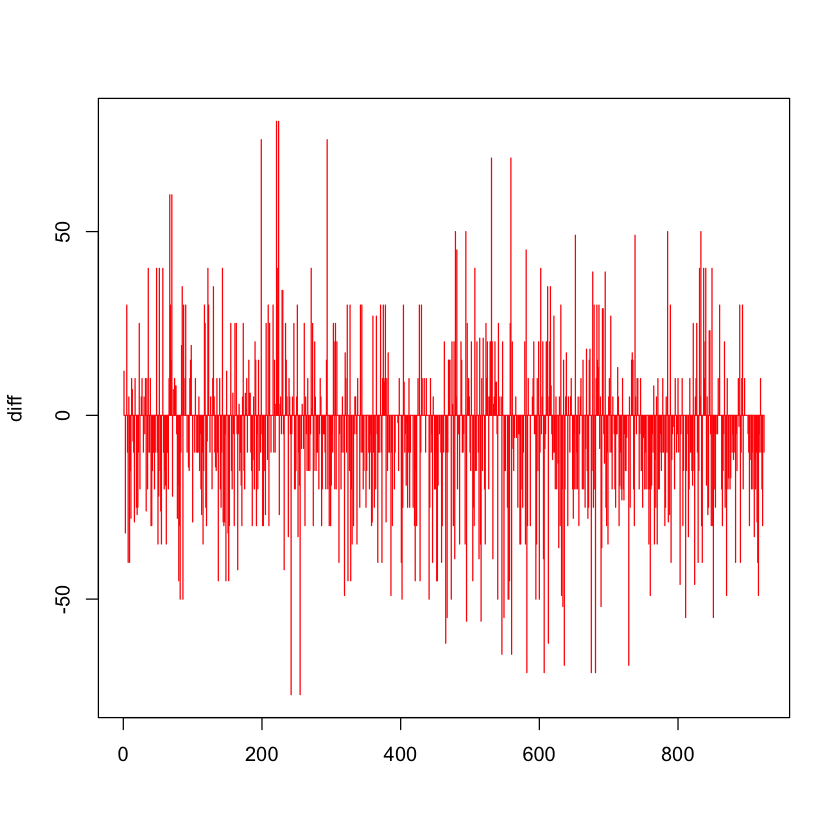

In [263]:
matplot(diff, type = "h", col = "red")

Разброс разницы достаточно большой


**В это же время данные даже не коррелируют (по Пирсону)**


,data.round,data.group.S_transfer,data.group.S_prediction,data.group.R_prediction,data.group.R_min_offer
data.round,1.000000000,0.05824892,0.06716667,-0.04787937,-0.004151831
data.group.S_transfer,0.058248924,1.00000000,0.57829512,0.19757400,0.155253553
data.group.S_prediction,0.067166672,0.57829512,1.00000000,0.21965844,0.231123244
data.group.R_prediction,-0.047879367,0.19757400,0.21965844,1.00000000,0.629484352
data.group.R_min_offer,-0.004151831,0.15525355,0.23112324,0.62948435,1.000000000


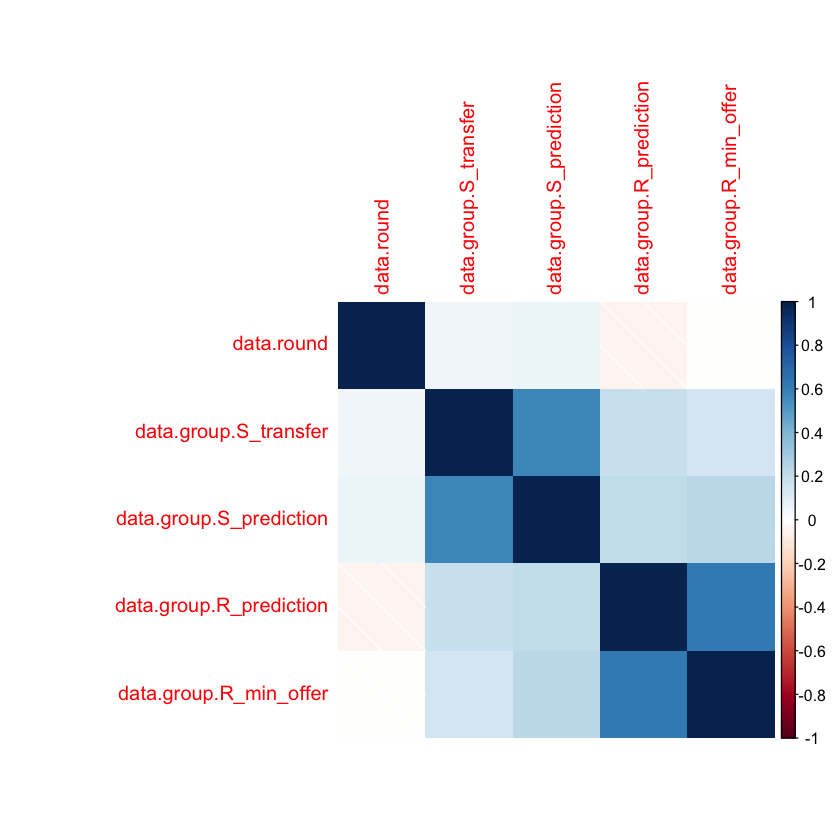

In [264]:
corr_mat = cor(m.sort)
corr_mat
corrplot(corr_mat, method = "shade")

**Можно считать гипотезу несостоятельной**

___________

# (d) Test the hypotheses that decisions are different by a) cities and b) gender. 

Перезадем фрейм для необходимых данных:

In [265]:
m <- data.frame(data$group.S_transfer, data$player.age, data$player.gender, data$cityname)

In [266]:
head(m)

,data.group.S_transfer,data.player.age,data.player.gender,data.cityname
,<int>,<int>,<int>,<chr>
1,48,20,0,S
2,30,20,0,S
3,65,20,0,S
4,0,20,0,S
5,17,20,0,S
6,9,20,0,S


In [267]:
tail(m)

,data.group.S_transfer,data.player.age,data.player.gender,data.cityname
,<int>,<int>,<int>,<chr>
919,25,NA,NA,M
920,15,NA,NA,M
921,45,NA,NA,M
922,25,NA,NA,M
923,75,NA,NA,M
924,15,NA,NA,M


Для реализации **cdplot** необходимо иметь данные типа **factor**

In [268]:
m <- mutate_each(m, "factor", data.player.age)
m <- mutate_each(m, "factor", data.player.gender)
m <- mutate_each(m, "factor", data.cityname)

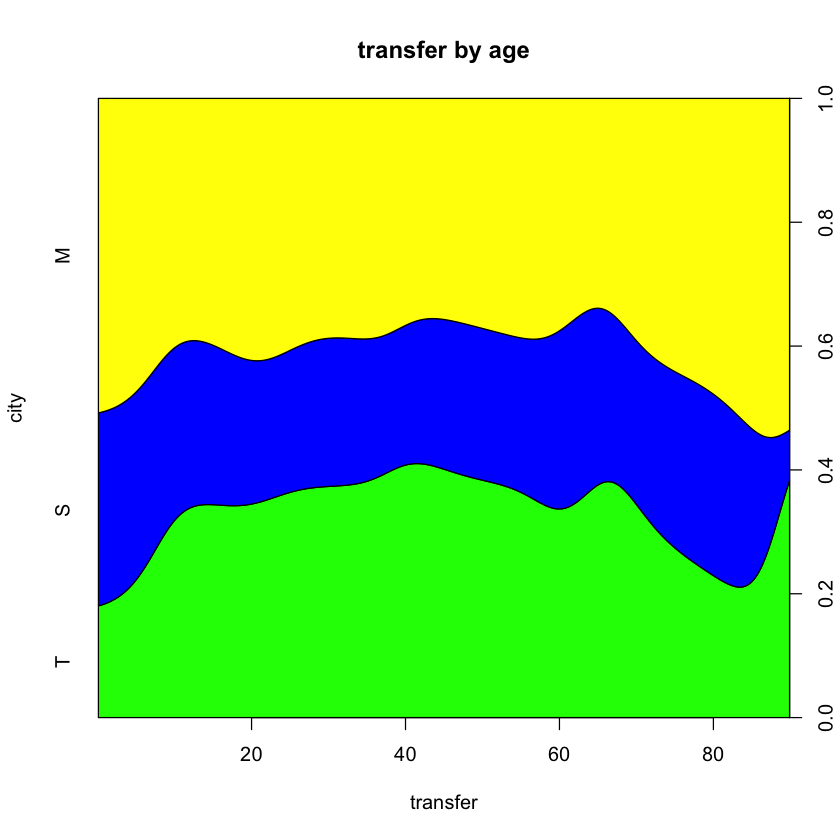

In [269]:
cdplot(m$data.group.S_transfer, m$data.cityname, col = c("green", "blue","yellow", "firebrick2", "red", "brown", "purple","lawngreen"),
       ylab = "city", xlab = "transfer", main = "transfer by age")

In [270]:
levels(m$data.cityname)

[1] "M" "S" "T"

**Название города никак не ограничивает значение трансфера, обратное тоже справедливо**
- Заметим, что город S самый неактивный

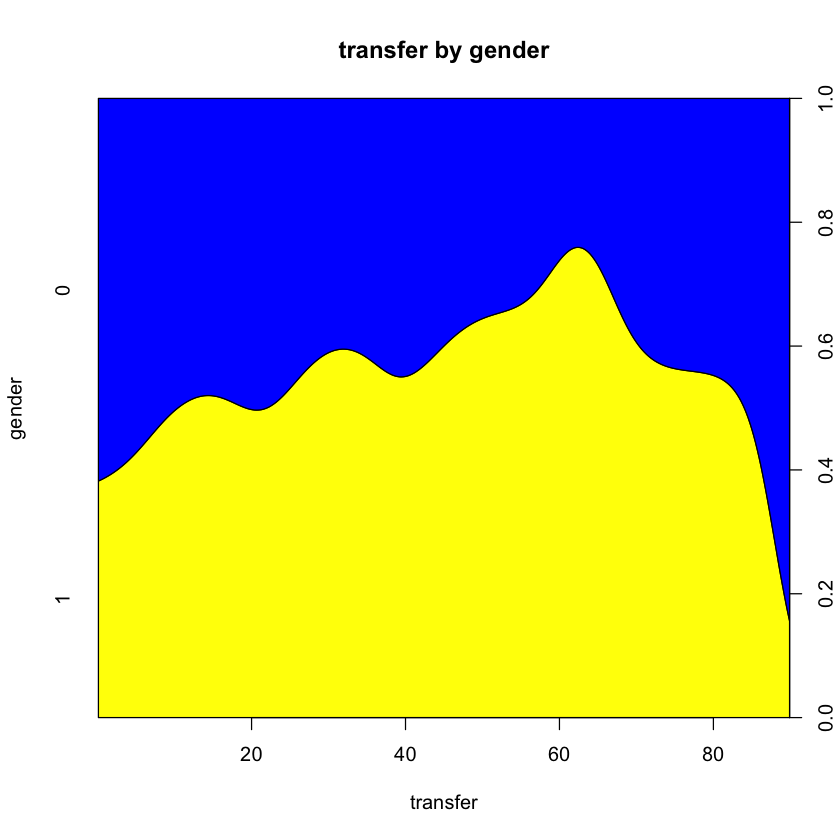

In [271]:
cdplot(m$data.group.S_transfer, m$data.player.gender, col = c("yellow", "blue"),
       ylab = "gender", xlab = "transfer", main = "transfer by gender")

**Пол никак не ограничивает значение трансфера, обратное тоже справедливо**

**Можно считать гипотезу несостоятельной, но стоит учитывать наличие в данных неизвестных данных NA**

__________

# (e) Think over other and test any other meaningful effects you can trace in the data

# Некоторые "Ящики с усами"

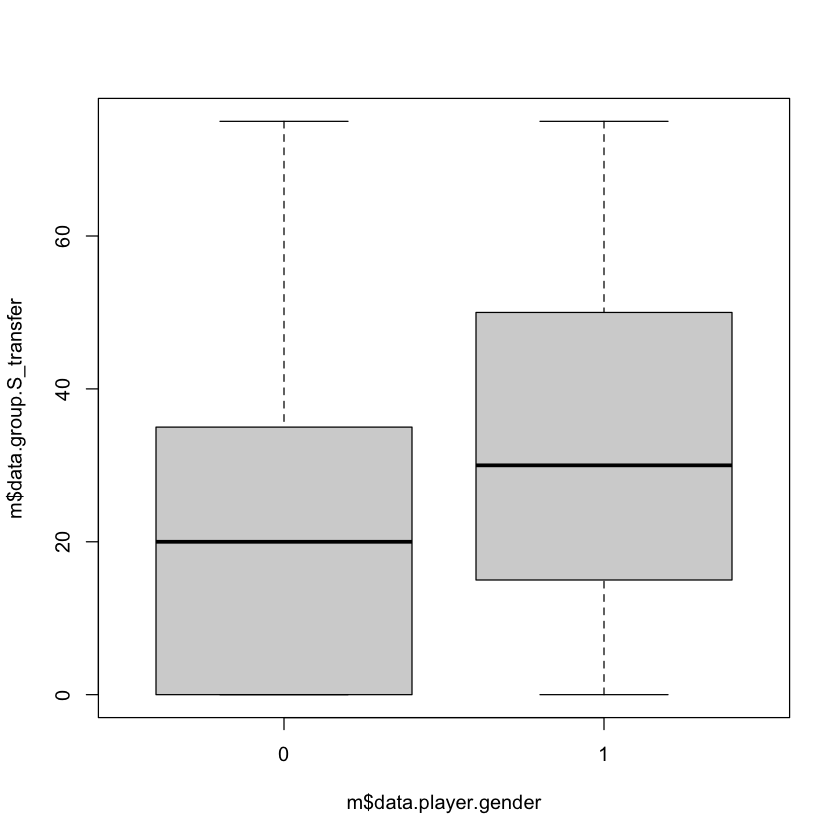

In [272]:
boxplot(m$data.group.S_transfer ~ m$data.player.gender, data=mtcars, subset=cyl %in% c(4,6))

- Участники с гентером 1 в среднем ставят более высокие значения трансфера
- нижний и верхние квартиили сильно различаются в зависимости от гендера 

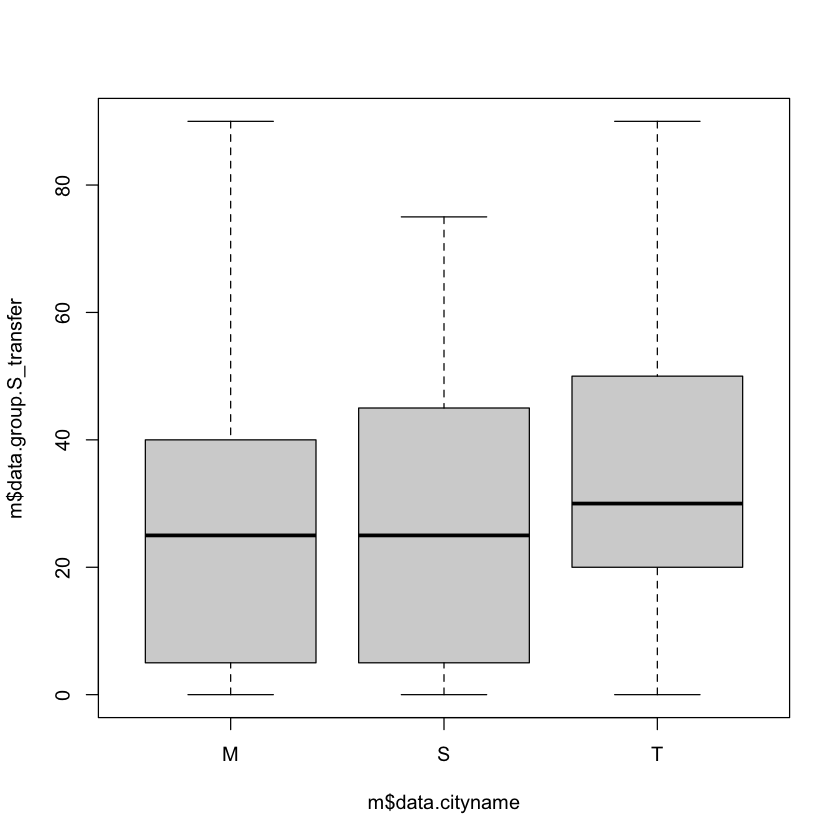

In [273]:
boxplot(m$data.group.S_transfer ~ m$data.cityname, data=mtcars, subset=cyl %in% c(4,6))

- Медиана для всех городов очень похожа
- Для городов M и S медиана и нижний квартиль равны

# Некоторые ядерные оценки плотностей

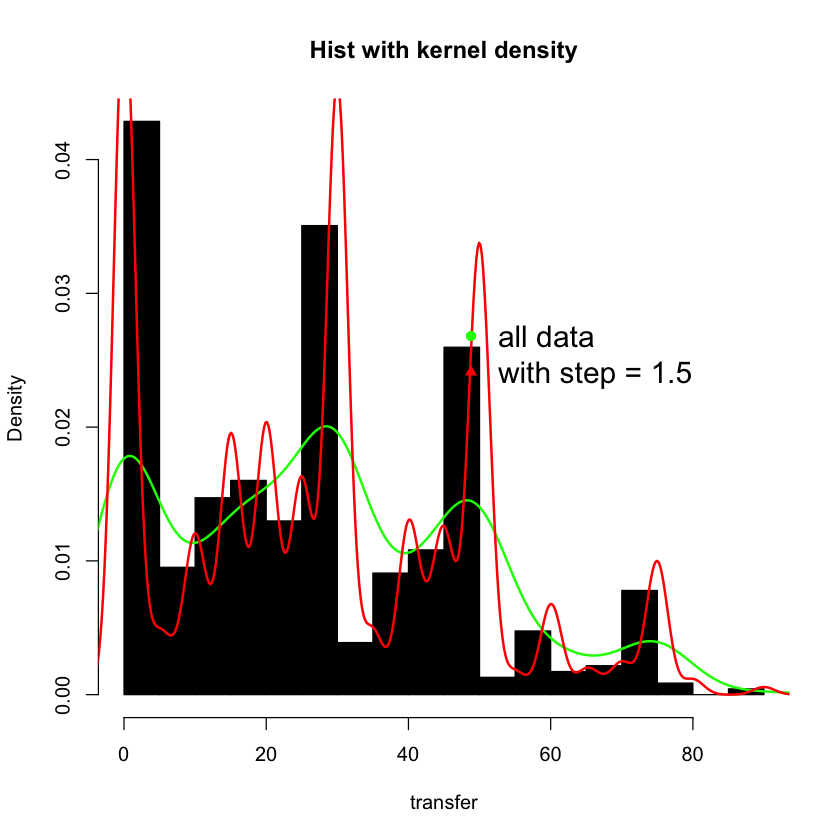

In [274]:
hist(data$group.S_transfer, col = "black",
	breaks = 20, freq = FALSE,
	xlab = "transfer", main = "Hist with kernel density")
lines(density(data$group.S_transfer), col = "green", lwd = 2)
lines(density(data$group.S_transfer, bw = 1.5), col = "red", lwd = 2)

legend("bottomleft", 
	legend = c("all data", "with step = 1.5"), 
	col = c("green", "red"),
	pch = c(19,17),
	bty = "n", 
	pt.cex = 1, 
	cex = 1.5, 
	text.col = "black", 
	horiz = F, 
	inset = c(0.5, 0.5))

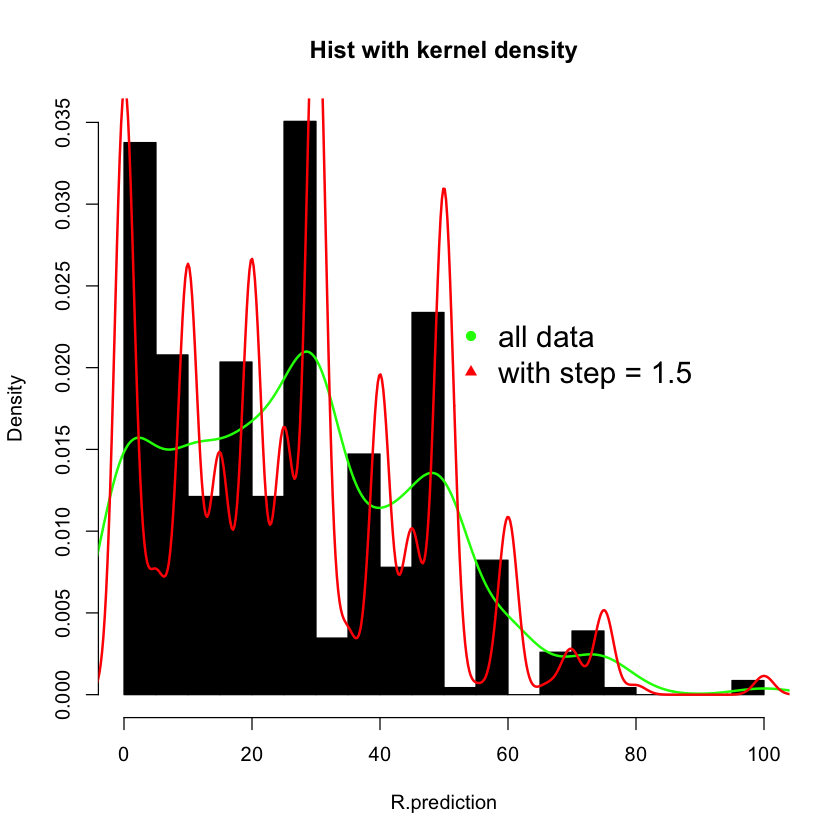

In [275]:
hist(data$group.R_prediction, col = "black",
	breaks = 20, freq = FALSE,
	xlab = "R.prediction", main = "Hist with kernel density")
lines(density(data$group.R_prediction), col = "green", lwd = 2)
lines(density(data$group.R_prediction, bw = 1.5), col = "red", lwd = 2)

legend("bottomleft", 
	legend = c("all data", "with step = 1.5"), 
	col = c("green", "red"),
	pch = c(19,17),
	bty = "n", 
	pt.cex = 1, 
	cex = 1.5, 
	text.col = "black", 
	horiz = F, 
	inset = c(0.5, 0.5))

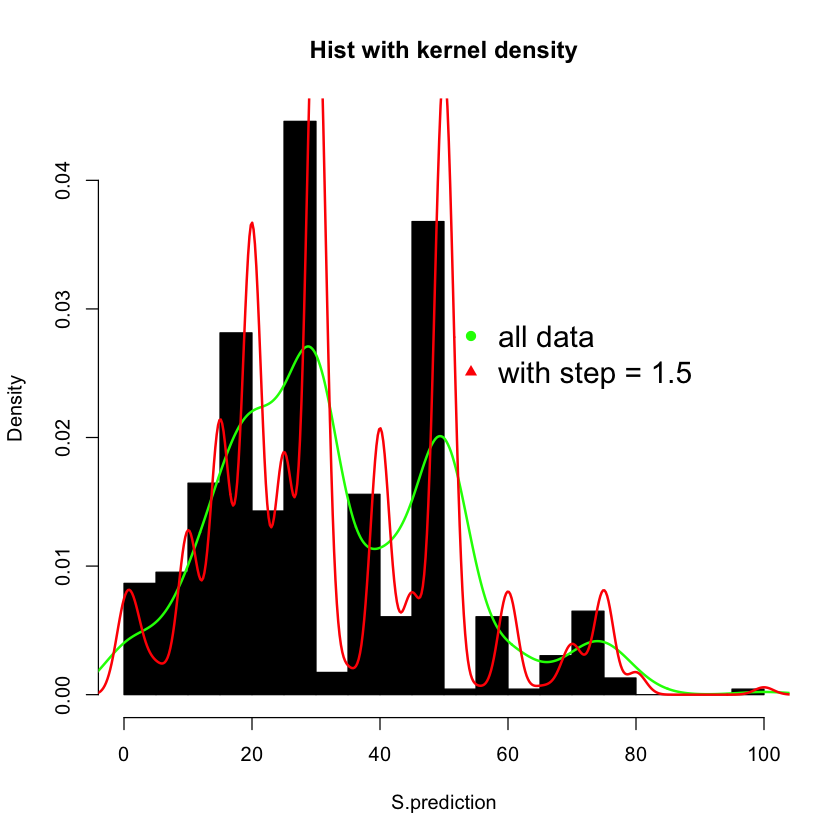

In [276]:
hist(data$group.S_prediction, col = "black",
	breaks = 20, freq = FALSE,
	xlab = "S.prediction", main = "Hist with kernel density")
lines(density(data$group.S_prediction), col = "green", lwd = 2)
lines(density(data$group.S_prediction, bw = 1.5), col = "red", lwd = 2)

legend("bottomleft", 
	legend = c("all data", "with step = 1.5"), 
	col = c("green", "red"),
	pch = c(19,17),
	bty = "n", 
	pt.cex = 1, 
	cex = 1.5, 
	text.col = "black", 
	horiz = F, 
	inset = c(0.5, 0.5))

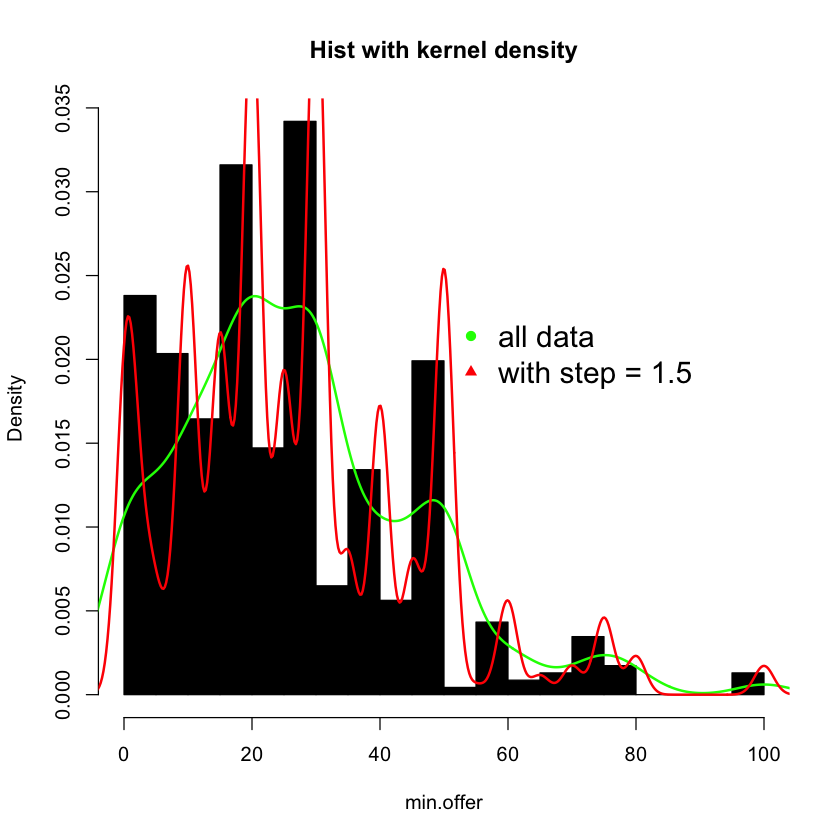

In [277]:
hist(data$group.R_min_offer, col = "black",
	breaks = 20, freq = FALSE,
	xlab = "min.offer", main = "Hist with kernel density")
lines(density(data$group.R_min_offer), col = "green", lwd = 2)
lines(density(data$group.R_min_offer, bw = 1.5), col = "red", lwd = 2)

legend("bottomleft", 
	legend = c("all data", "with step = 1.5"), 
	col = c("green", "red"),
	pch = c(19,17),
	bty = "n", 
	pt.cex = 1, 
	cex = 1.5, 
	text.col = "black", 
	horiz = F, 
	inset = c(0.5, 0.5))